### 2d_hex.ipynb
#### Examples of range expansions on a hexagonal grid.
---
First, include RESK and plots:

In [1]:
include("../resk.jl")
include("../reskplots.jl")

RESK successfully loaded.
RESKPlots successfully loaded.


Let us try out the hexagonal grid:

In [16]:
test = rangeexp_strip(60,60;data_to_generate="FPSN",migr_mode="hex",x_max_burnin=3, x_max_exp=32, y_max=5,mut_rate=0.5)

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[0.0 NaN … NaN NaN; 0.0 0.0 … 0.0 NaN; … ; NaN NaN … NaN Na…
  "pops"  => Float32[22.0 NaN … NaN NaN; 12.0 20.0 … 19.0 NaN; … ; NaN NaN … Na…
  "aasel" => Float32[500.0 NaN … NaN NaN; 500.0 500.0 … 500.0 NaN; … ; NaN NaN …
  "fitn"  => Float32[1.0 NaN … NaN NaN; 1.0 1.0 … 1.0 NaN; … ; NaN NaN … NaN Na…
  "aaneu" => Float32[500.0 NaN … NaN NaN; 500.0 500.0 … 500.0 NaN; … ; NaN NaN …
  "Aasel" => Float32[0.0 NaN … NaN NaN; 0.0 0.0 … 0.0 NaN; … ; NaN NaN … NaN Na…
  "Aaneu" => Float32[0.0 NaN … NaN NaN; 0.0 0.0 … 0.0 NaN; … ; NaN NaN … NaN Na…
  "AAneu" => Float32[0.0 NaN … NaN NaN; 0.0 0.0 … 0.0 NaN; … ; NaN NaN … NaN Na…
  "stats" => Dict{String, Any}("capacity"=>20, "wlddim"=>2, "max_burnin"=>(3, 5…

(1.0f0, 41.0f0)


┌ Info: Frames for animation "test.gif" are being stored in directory: 
│ 	 C:\Users\Hartree\AppData\Local\Temp\jl_pmsgAp
└ @ Luxor C:\Users\Hartree\.julia\packages\Luxor\0kqwd\src\animate.jl:199
┌ Info: ... 120 frames saved in directory:
│ 	 C:\Users\Hartree\AppData\Local\Temp\jl_pmsgAp
└ @ Luxor C:\Users\Hartree\.julia\packages\Luxor\0kqwd\src\animate.jl:221
┌ Info: GIF is: C:\Users\Hartree\AppData\Local\Temp\jl_pmsgAp/test.gif.gif
└ @ Luxor C:\Users\Hartree\.julia\packages\Luxor\0kqwd\src\animate.jl:266


Luxor.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_pmsgAp/test.gif.gif")
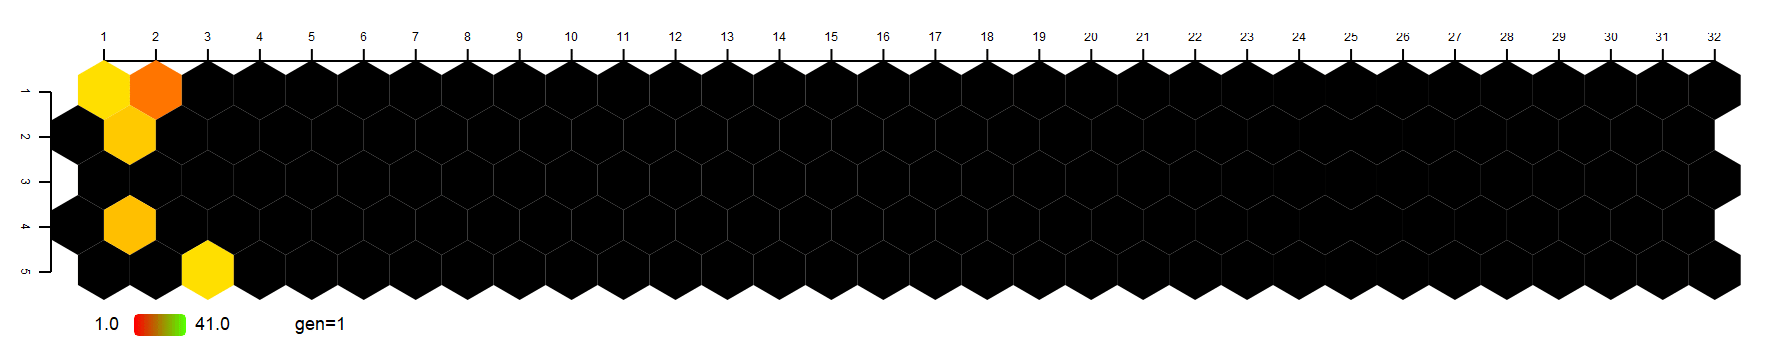

In [17]:
re_heatmap(test,"pops")

`re_heatmap` detects the `migr_mode` parameter and switches to graph a hexagonal grid. The black squares at around `x=6` are how the default bottleneck looks in the hexagonal setup. Let's also look at deme fitness:

(0.971655f0, 1.0f0)


┌ Info: Frames for animation "test.gif" are being stored in directory: 
│ 	 C:\Users\Hartree\AppData\Local\Temp\jl_V6BjA9
└ @ Luxor C:\Users\Hartree\.julia\packages\Luxor\0kqwd\src\animate.jl:199
┌ Info: ... 120 frames saved in directory:
│ 	 C:\Users\Hartree\AppData\Local\Temp\jl_V6BjA9
└ @ Luxor C:\Users\Hartree\.julia\packages\Luxor\0kqwd\src\animate.jl:221
┌ Info: GIF is: C:\Users\Hartree\AppData\Local\Temp\jl_V6BjA9/test.gif.gif
└ @ Luxor C:\Users\Hartree\.julia\packages\Luxor\0kqwd\src\animate.jl:266


Luxor.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_V6BjA9/test.gif.gif")
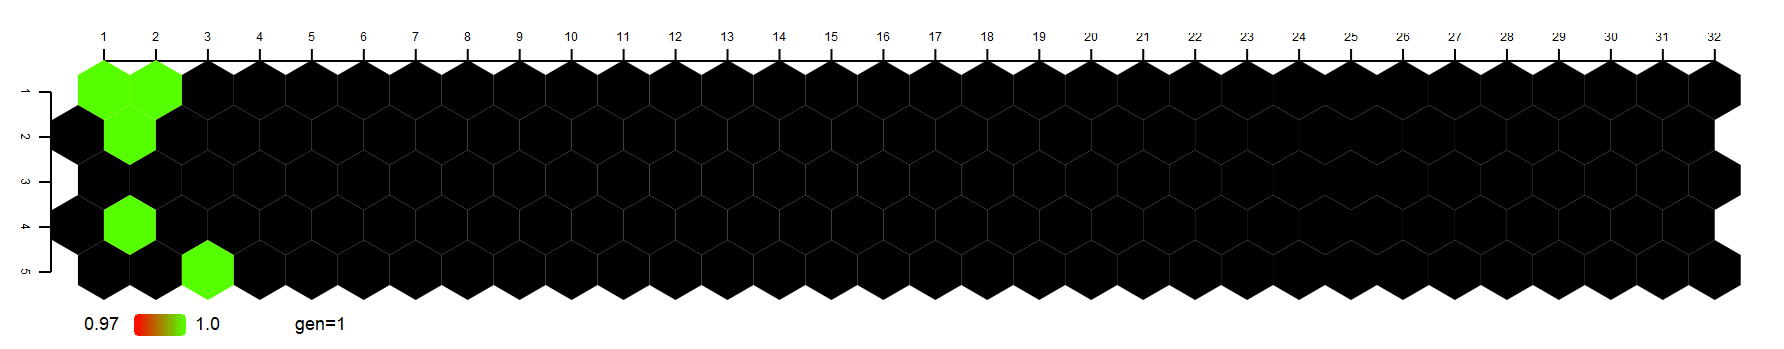

In [18]:
re_heatmap(test,"fitn")

---

Let's compare the hexagonal grid to orthogonal only (`ort`) and orthogonal + half-weighted diagonal (`half`) movement on the square grid:

In [12]:
hex = rangeexp_strip_inf(100,100,30;data_to_generate="FPSN",migr_mode="hex", x_max_burnin=5, x_max_exp=90, y_max=5, capacity=35, prolif_rate=1.8, n_segr_regions=100, mut_rate=0.2,migr_rate=0.15,sel_coef=0.002,bottleneck=NaN)
ort = rangeexp_strip_inf(100,100,30;data_to_generate="FPSN",migr_mode="ort", x_max_burnin=5, x_max_exp=90, y_max=5, capacity=35, prolif_rate=1.8, n_segr_regions=100, mut_rate=0.2,migr_rate=0.15,sel_coef=0.002,bottleneck=NaN)
half = rangeexp_strip_inf(100,100,30;data_to_generate="FPSN",migr_mode="diag1/2", x_max_burnin=5, x_max_exp=90, y_max=5, capacity=35, prolif_rate=1.8, n_segr_regions=100, mut_rate=0.2,migr_rate=0.15,sel_coef=0.002,bottleneck=NaN)

Dict{String, Any} with 5 entries:
  "pops"  => Float32[64.0 72.0 … 51.0 82.0; 70.0 71.0 … 52.0 73.0; … ; NaN NaN …
  "del"   => Float32[]
  "fitn"  => Float32[1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; NaN NaN … NaN Na…
  "stats" => Dict{String, Any}("wlddim"=>2, "max_burnin"=>(5, 5), "name"=>"2024…
  "ben"   => Float32[]

Define a custom function to neatly calculate mean front fitness:

In [13]:
function analyse(re,dataname="fitn")
    re_fitn_frontav = average_front(re,dataname;oneside=true)
    re_fitn_frontav_mean = average_ts(re_fitn_frontav, re["stats"]["n_gens"])
    re_fitn_frontav_meanN = norm_onset_mean(re_fitn_frontav_mean, re["stats"]["n_gens_burnin"]+1)
    return re_fitn_frontav_meanN, re_fitn_frontav_mean
end

hex_fitn,w = analyse(hex)
ort_fitn,w = analyse(ort)
half_fitn,w = analyse(half)

(Float32[1.0, 0.999669, 0.99949265, 0.99935067, 0.99920654, 0.9990234, 0.9988854, 0.9987099, 0.9985994, 0.9984341  …  0.9881133, 0.9879104, 0.98751646, 0.9875222, 0.9874173, 0.9871183, 0.987284, 0.98673165, 0.98655075, 0.98639977], Float32[1.0, 0.999669, 0.99949265, 0.99935067, 0.99920654, 0.9990234, 0.9988854, 0.9987099, 0.9985994, 0.9984341  …  0.97356254, 0.9733626, 0.9729745, 0.97298014, 0.9728768, 0.9725822, 0.9727455, 0.9722012, 0.972023, 0.97187424])

Output the mean front fitness plot:

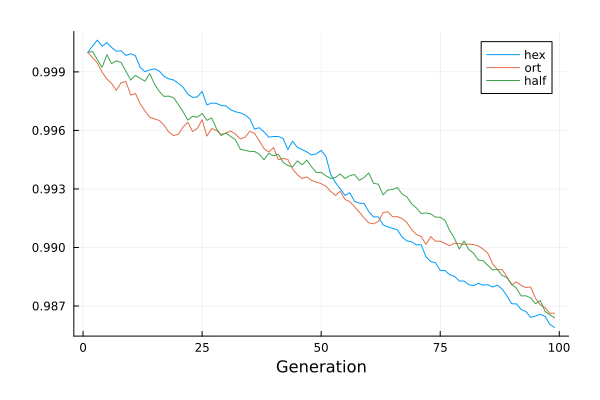

In [14]:
Plots.plot(hex_fitn[(hex["stats"]["n_gens_burnin"]+2):end],label="hex",xlabel="Generation")
Plots.plot!(ort_fitn[(ort["stats"]["n_gens_burnin"]+2):end],label="ort",xlabel="Generation")
Plots.plot!(half_fitn[(half["stats"]["n_gens_burnin"]+2):end],label="half",xlabel="Generation")

We see that there is no substantial difference between migration modes, at least with these parameters.

Here are results from a longer run with different parameters:

In [6]:
hex = deserialize("../data/hextest_hex.re")
ort = deserialize("../data/hextest_ort.re")
half = deserialize("../data/hextest_half.re")

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; NaN NaN … NaN Na…
  "pops"  => Float32[78.0 84.0 … 80.0 71.0; 68.0 66.0 … 53.0 55.0; … ; NaN NaN …
  "aasel" => Float32[312.0 312.0 … 312.0 312.0; 312.0 312.0 … 312.0 312.0; … ; …
  "fitn"  => Float32[1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; NaN NaN … NaN Na…
  "aaneu" => Float32[688.0 688.0 … 688.0 688.0; 688.0 688.0 … 688.0 688.0; … ; …
  "Aasel" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; NaN NaN … NaN Na…
  "Aaneu" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; NaN NaN … NaN Na…
  "AAneu" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; NaN NaN … NaN Na…
  "stats" => Dict{String, Any}("n_sel_loci"=>312, "sel_loci"=>[892, 936, 142, 4…

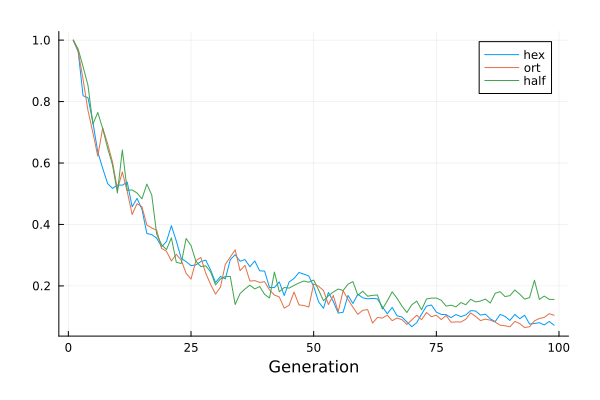

In [6]:
Plots.plot(hex_Aasel[(hex["stats"]["n_gens_burnin"]+2):end],label="hex",xlabel="Generation")
Plots.plot!(ort_Aasel[(ort["stats"]["n_gens_burnin"]+2):end],label="ort",xlabel="Generation")
Plots.plot!(half_Aasel[(half["stats"]["n_gens_burnin"]+2):end],label="half",xlabel="Generation")

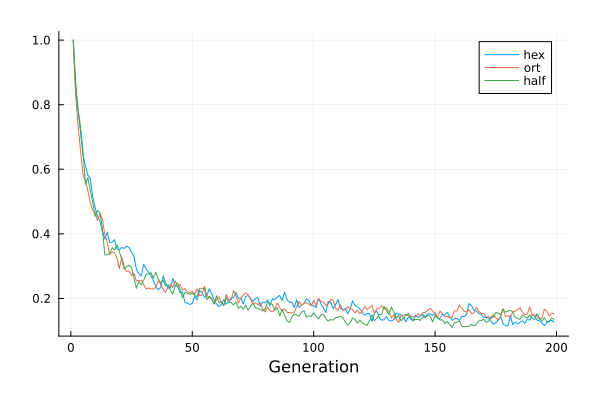

In [8]:
Plots.plot(hex_Aasel[(hex["stats"]["n_gens_burnin"]+2):end],label="hex",xlabel="Generation")
Plots.plot!(ort_Aasel[(ort["stats"]["n_gens_burnin"]+2):end],label="ort",xlabel="Generation")
Plots.plot!(half_Aasel[(half["stats"]["n_gens_burnin"]+2):end],label="half",xlabel="Generation")

(0.61729014f0, 1.0f0)


┌ Info: Frames for animation "test.gif" are being stored in directory: 
│ 	 C:\Users\Hartree\AppData\Local\Temp\jl_Azwhdx
└ @ Luxor C:\Users\Hartree\.julia\packages\Luxor\0kqwd\src\animate.jl:199
┌ Info: ... 1 frames saved in directory:
│ 	 C:\Users\Hartree\AppData\Local\Temp\jl_Azwhdx
└ @ Luxor C:\Users\Hartree\.julia\packages\Luxor\0kqwd\src\animate.jl:221
┌ Info: GIF is: C:\Users\Hartree\AppData\Local\Temp\jl_Azwhdx/test.gif.gif
└ @ Luxor C:\Users\Hartree\.julia\packages\Luxor\0kqwd\src\animate.jl:266


Luxor.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_Azwhdx/test.gif.gif")
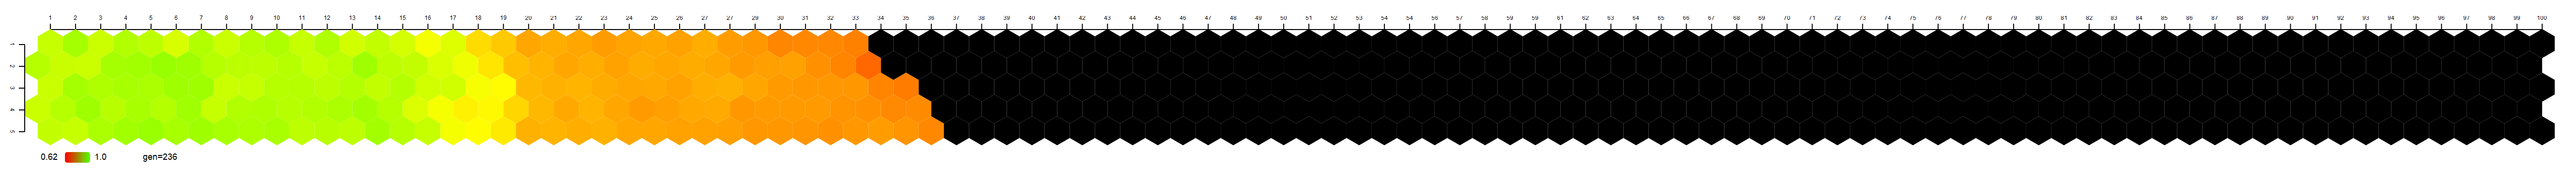

In [16]:
re_heatmap(hex,"fitn",236,236,re_index=3)

(0.66062635f0, 1.0f0)


┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_0lMVYBC705.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_0lMVYBC705.gif")
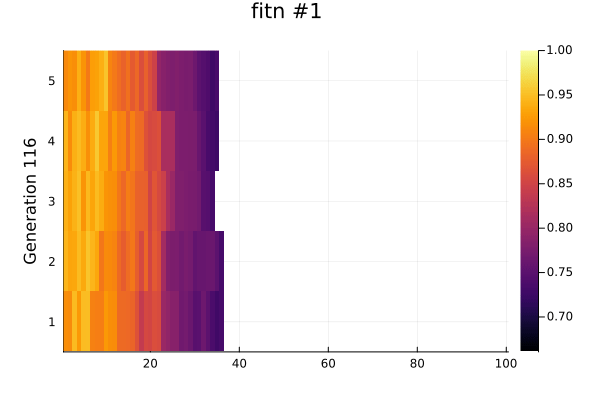

In [14]:
re_heatmap(ort,"fitn",235,236)